In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import sys
sys.path.insert(0, "../../")

# Import

In [5]:
import pandas
import root_numpy
from folding_group import FoldingGroupClassifier
from decisiontrain import DecisionTrainClassifier
from rep.estimators import SklearnClassifier

/mnt/mfs/miniconda/envs/rep_py2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Read $B^\pm \to J\psi K^\pm$ MC samples

In [6]:
data = pandas.DataFrame(root_numpy.root2array('../../datasets/MC/csv/WG/Bu_JPsiK/2012/Tracks.root'))

In [7]:
data.columns

Index([u'run', u'event', u'Bmass', u'time', u'i', u'mult', u'partP', u'partPt',
       u'ptB', u'IPs', u'IP', u'IPerr', u'partlcs', u'EOverP', u'ghostProb',
       u'IPPU', u'nnkrec', u'PIDNNk', u'PIDNNpi', u'PIDNNp', u'PIDNNm',
       u'PIDNNe', u'diff_eta', u'diff_phi', u'phi', u'eta', u'proj', u'ID',
       u'veloch', u'signB', u'signTrack', u'Dist_phi', u'N_sig_sw', u'mu_cut',
       u'e_cut', u'K_cut', u'MCID', u'OS_SS', u'xFlag', u'K_MCID', u'BOosc'],
      dtype='object')

In [8]:
from utils import data_tracks_preprocessing
data = data_tracks_preprocessing(data)

/mnt/mfs/miniconda/envs/rep_py2/lib/python2.7/site-packages/pandas/core/indexing.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/mnt/mfs/miniconda/envs/rep_py2/lib/python2.7/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Initial statistics: {'parts': 33632195, 'Events': 1488891}
after  (ghostProb < 0.4)  selection, statistics: {'parts': 32813556, 'Events': 1488885}
after   ( (PIDNNk > 0.0) | (PIDNNm > 0.0) | (PIDNNe > 0.0) | (PIDNNpi > 0.0) | (PIDNNp > 0.0))   selection, statistics: {'parts': 32808324, 'Events': 1488885}


In [9]:
len(data)

32808324

In [10]:
data.columns

Index([u'run', u'event', u'Bmass', u'time', u'i', u'mult', u'partP', u'partPt',
       u'ptB', u'IPs', u'IP', u'IPerr', u'partlcs', u'EOverP', u'ghostProb',
       u'IPPU', u'nnkrec', u'PIDNNk', u'PIDNNpi', u'PIDNNp', u'PIDNNm',
       u'PIDNNe', u'diff_eta', u'diff_phi', u'phi', u'eta', u'proj', u'ID',
       u'veloch', u'signB', u'signTrack', u'Dist_phi', u'N_sig_sw', u'mu_cut',
       u'e_cut', u'K_cut', u'MCID', u'OS_SS', u'xFlag', u'K_MCID', u'BOosc',
       u'group_column', u'event_id', u'diff_pt', u'cos_diff_phi',
       u'max_PID_mu_k', u'sum_PID_mu_k', u'max_PID_mu_e', u'sum_PID_mu_e',
       u'max_PID_k_e', u'sum_PID_k_e', u'label'],
      dtype='object')

(array([  4249707.,   1092978.,    753902.,    654771.,    662661.,
           767377.,   1036587.,   1637378.,   3119303.,  14261317.]),
 array([ 0.        ,  0.09999873,  0.19999746,  0.29999619,  0.39999492,
         0.49999365,  0.59999238,  0.69999111,  0.79998984,  0.89998857,
         0.9999873 ]),
 <a list of 10 Patch objects>)

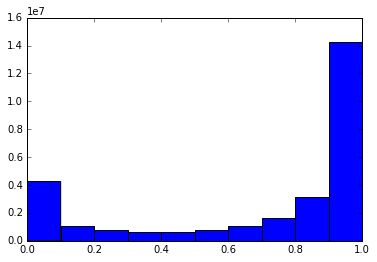

In [11]:
hist(data.PIDNNpi[data.PIDNNm < 0].values)

(array([ 21738245.,   2550815.,   1128360.,    698935.,    511239.,
           419523.,    355208.,    309259.,    277349.,    247048.]),
 array([ 0.        ,  0.03999998,  0.07999996,  0.11999994,  0.15999992,
         0.1999999 ,  0.23999988,  0.27999986,  0.31999984,  0.35999982,
         0.3999998 ]),
 <a list of 10 Patch objects>)

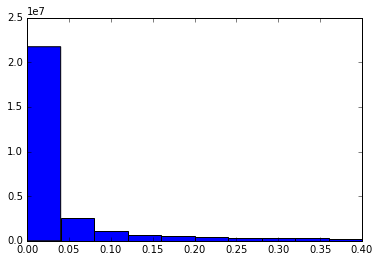

In [12]:
hist(data.ghostProb[data.PIDNNm < 0].values)

In [13]:
features = ['diff_phi', 'partPt', 'partP', 'nnkrec', 'diff_eta', 'EOverP', 
            'ptB', 'proj', 'PIDNNe', 'PIDNNk', 'PIDNNm', 'PIDNNpi', 'PIDNNp',
            'phi', 'IP', 'IPerr', 'veloch', 'ghostProb', 'IPPU', 'eta', 'partlcs', u'signB', u'signTrack',
            'group_column']

In [14]:
x = numpy.unique(data.group_column)

In [15]:
from rep.utils import train_test_split_group
data_new = data[features]

In [16]:
data, _ = train_test_split_group(data.group_column, data_new, train_size=500000)

In [17]:
len(data)

11022371

In [18]:
data.dtypes

diff_phi        float32
partPt          float32
partP           float32
nnkrec            int32
diff_eta        float32
EOverP          float32
ptB             float32
proj            float32
PIDNNe          float32
PIDNNk          float32
PIDNNm          float32
PIDNNpi         float32
PIDNNp          float32
phi             float32
IP              float32
IPerr           float32
veloch          float32
ghostProb       float32
IPPU            float32
eta             float32
partlcs         float32
signB             int32
signTrack       float32
group_column      int64
dtype: object

In [19]:
root_numpy.array2root(data.to_records(index=False), "tagging.root", mode='recreate')